In [55]:
import pandas as pd
import numpy as np

df1 = pd.read_csv('Samples/2015/2015byHourFWIX.csv')
df2 = pd.read_csv('Samples/2019/2019byHourFWIX.csv')
df3 = pd.read_csv('Samples/2022/2022byHourFWIX.csv')

df1['location'] = 'Location 1'
df2['location'] = 'Location 2'
df3['location'] = 'Location 3'


df1['wildfire'] = 0
df2['wildfire'] = 0
df3['wildfire'] = 0

df1.iloc[-24:, df1.columns.get_loc('wildfire')] = 1
df2.iloc[-24:, df2.columns.get_loc('wildfire')] = 1
df3.iloc[-24:, df3.columns.get_loc('wildfire')] = 1


print(df1['wildfire'].value_counts())
print(df2['wildfire'].value_counts())
print(df3['wildfire'].value_counts())

pd.set_option('display.max_rows', None)
print(df2['wildfire'])

wildfire
0    2435
1      13
Name: count, dtype: int64
wildfire
0    1648
1       8
Name: count, dtype: int64
wildfire
0    321
1     15
Name: count, dtype: int64
0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
30      0
31      0
32      0
33      0
34      0
35      0
36      0
37      0
38      0
39      0
40      0
41      0
42      0
43      0
44      0
45      0
46      0
47      0
48      0
49      0
50      0
51      0
52      0
53      0
54      0
55      0
56      0
57      0
58      0
59      0
60      0
61      0
62      0
63      0
64      0
65      0
66      0
67      0
68      0
69      0
70      0
71      0
72      0
73      0
74      0
75      0
76      0
77      0
78      0
79      0
80      0
81      0
82      0
83     

In [ ]:
'''Feature selection is a process where you automatically select those features in your data that contribute most to the prediction variable or output in which you are interested. Having irrelevant features in your data can decrease the accuracy of many models, especially linear algorithms like linear and logistic regression.

Here are some common techniques for feature selection in machine learning:

1. **Univariate Selection**: Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the `SelectKBest` class that can be used with a suite of different statistical tests to select a specific number of features.

2. **Recursive Feature Elimination**: The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain. It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predict the target attribute.

3. **Principle Component Analysis (PCA)**: PCA is a dimensionality reduction technique that can be used to reduce a large set of variables to a small set that still contains most of the information in the large set.

4. **Feature Importance**: You can get the feature importance of each feature of your dataset by using the feature importance property of the model. Feature importance gives you a score for each feature of your data, the higher the score more important or relevant is the feature towards your output variable.

5. **Correlation Matrix with Heatmap**: Correlation states how the features are related to each other or the target variable. Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable).

Remember, feature selection methods are a means of reducing overfitting, improving accuracy, and improving model performance.'''

In [49]:
df = pd.concat([df1, df2, df3])


df = df.drop(['latitude','hourly.is_day','longitude','altitude','hourly.time','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code'], axis=1)


df_numeric = df.select_dtypes(include=[np.number])
correlations = df_numeric.corrwith(df_numeric['wildfire']).sort_values(ascending=False)


from sklearn.ensemble import RandomForestClassifier

X = df_numeric.drop('wildfire', axis=1)
y = df_numeric['wildfire']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [50]:
print("Correlations:\n", correlations)


Correlations:
 wildfire                                   1.000000
hourly.surface_pressure                    0.100429
hourly.soil_temperature_100_to_255cm       0.042012
hourly.apparent_temperature                0.041006
hourly.soil_temperature_0_to_7cm           0.040580
hourly.temperature_2m                      0.037319
hourly.soil_moisture_7_to_28cm             0.028131
hourly.vapour_pressure_deficit             0.027328
hourly.cloud_cover_mid                     0.024517
hourly.soil_moisture_0_to_7cm              0.024114
hourly.sunshine_duration                   0.021432
hourly.et0_fao_evapotranspiration          0.015804
hourly.rain                                0.015280
hourly.precipitation                       0.015280
hourly.terrestrial_radiation               0.014879
hourly.cloud_cover_high                    0.014494
hourly.shortwave_radiation                 0.011379
hourly.global_tilted_irradiance            0.011379
hourly.dew_point_2m                        0.0112

In [51]:
print("\nFeature Importances:\n", importances)


Feature Importances:
                                     feature  importance
43                                       dc       0.091
42                                      dmc       0.075
26        hourly.soil_moisture_100_to_255cm       0.073
45                                      bui       0.067
7                   hourly.surface_pressure       0.067
24           hourly.soil_moisture_7_to_28cm       0.064
22     hourly.soil_temperature_100_to_255cm       0.058
21      hourly.soil_temperature_28_to_100cm       0.051
25         hourly.soil_moisture_28_to_100cm       0.039
20        hourly.soil_temperature_7_to_28cm       0.036
23            hourly.soil_moisture_0_to_7cm       0.035
18                    hourly.wind_gusts_10m       0.021
3               hourly.apparent_temperature       0.020
40                                     fwix       0.020
10                   hourly.cloud_cover_mid       0.019
44                                      isi       0.018
17               hourly.w

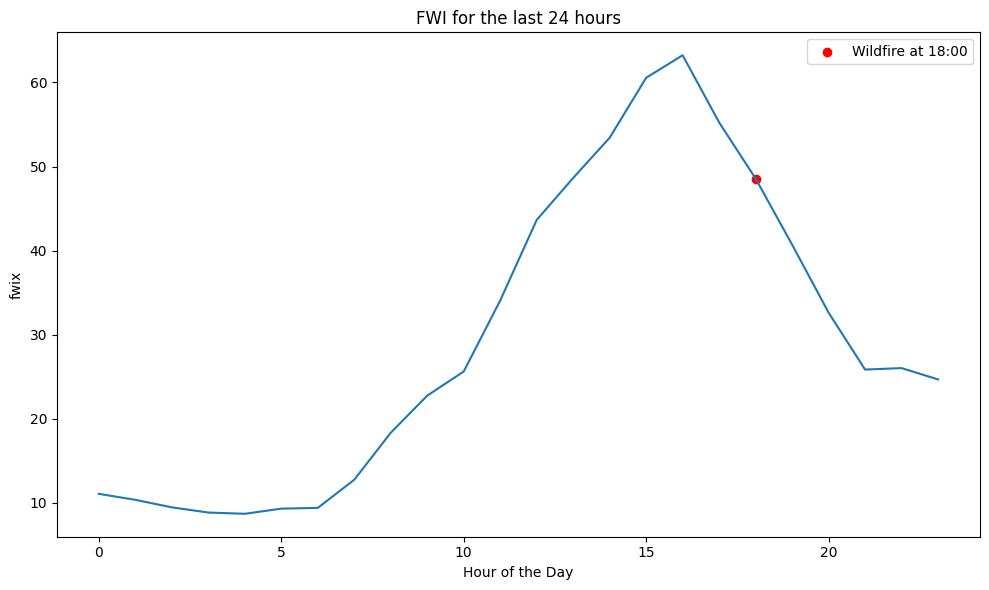

In [87]:
import matplotlib.pyplot as plt

var = 'fwix'

if 'hourly.time' in df3.columns:
    df3['hourly.time'] = pd.to_datetime(df3['hourly.time'])
    df3.set_index('hourly.time', inplace=True)

df3['hour'] = df3.index.hour

plt.figure(figsize=(10, 6))

plt.plot(df3['hour'].tail(24), df3[f'{var}'].tail(24))

value_at_11 = df3[df3['hour'] == 18][f'{var}'].tail(1)

plt.scatter(18, value_at_11, color='red', label='Wildfire at 18:00')

plt.title(f'FWI for the last 24 hours')
plt.xlabel('Hour of the Day')
plt.ylabel(f'{var}')

plt.legend()

plt.tight_layout()

plt.savefig(f'{var}_24_2022.png')

plt.show()

In [64]:
import pandas as pd

df1 = pd.read_csv('Samples/2015/2015byHourFWIX.csv')
df2 = pd.read_csv('Samples/2019/2019byHourFWIX.csv')
df3 = pd.read_csv('Samples/2022/2022byHourFWIX.csv')

df1['hourly.time'] = pd.to_datetime(df1['hourly.time'])
df2['hourly.time'] = pd.to_datetime(df2['hourly.time'])
df3['hourly.time'] = pd.to_datetime(df3['hourly.time'])

df1.set_index('hourly.time', inplace=True)
df2.set_index('hourly.time', inplace=True)
df3.set_index('hourly.time', inplace=True)

df1_daily = df1.resample('D').mean()
df2_daily = df2.resample('D').mean()
df3_daily = df3.resample('D').mean()

if 'wildfire' not in df1_daily.columns:
    df1_daily['wildfire'] = 0
if 'wildfire' not in df2_daily.columns:
    df2_daily['wildfire'] = 0
if 'wildfire' not in df3_daily.columns:
    df3_daily['wildfire'] = 0

df1_daily.iloc[-1, df1_daily.columns.get_loc('wildfire')] = 1
df2_daily.iloc[-1, df2_daily.columns.get_loc('wildfire')] = 1
df3_daily.iloc[-1, df3_daily.columns.get_loc('wildfire')] = 1

print(df1_daily['hourly.temperature_2m'])
#print(df2_daily['wildfire'])
#print(df3_daily['wildfire'])

hourly.time
2015-06-20    25.112500
2015-06-21    26.408333
2015-06-22    22.516667
2015-06-23    18.408333
2015-06-24    20.529167
2015-06-25    24.029167
2015-06-26    25.262500
2015-06-27    26.829167
2015-06-28    28.070833
2015-06-29    29.625000
2015-06-30    27.454167
2015-07-01    20.908333
2015-07-02    21.008333
2015-07-03    22.366667
2015-07-04    23.379167
2015-07-05    24.208333
2015-07-06    26.629167
2015-07-07    24.970833
2015-07-08    26.750000
2015-07-09    28.029167
2015-07-10    22.537500
2015-07-11    23.683333
2015-07-12    25.387500
2015-07-13    27.529167
2015-07-14    27.904167
2015-07-15    27.291667
2015-07-16    25.108333
2015-07-17    26.141667
2015-07-18    23.612500
2015-07-19    23.454167
2015-07-20    25.404167
2015-07-21    24.800000
2015-07-22    25.520833
2015-07-23    24.758333
2015-07-24    20.729167
2015-07-25    23.250000
2015-07-26    24.554167
2015-07-27    23.841667
2015-07-28    24.779167
2015-07-29    22.708333
2015-07-30    22.533333
2015

In [61]:
df_daily = pd.concat([df1_daily, df2_daily, df3_daily])


df_daily = df_daily.drop(['latitude','hourly.is_day','longitude','altitude','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code'], axis=1)


df_numeric = df_daily.select_dtypes(include=[np.number])
correlations = df_numeric.corrwith(df_numeric['wildfire']).sort_values(ascending=False)


from sklearn.ensemble import RandomForestClassifier

X = df_numeric.drop('wildfire', axis=1)
y = df_numeric['wildfire']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [62]:
print("Correlations:\n", correlations)

Correlations:
 wildfire                                   1.000000
hourly.surface_pressure                    0.110130
hourly.soil_moisture_0_to_7cm              0.061592
hourly.soil_temperature_100_to_255cm       0.060692
hourly.dew_point_2m                        0.035729
hourly.cloud_cover_mid                     0.028481
hourly.soil_moisture_7_to_28cm             0.023361
hourly.apparent_temperature                0.022208
hourly.pressure_msl                        0.018022
hourly.relative_humidity_2m                0.012866
hourly.rain                                0.003206
hourly.precipitation                       0.003206
hourly.temperature_2m                      0.001961
hourly.sunshine_duration                  -0.009491
hourly.soil_temperature_28_to_100cm       -0.009654
hourly.vapour_pressure_deficit            -0.018277
hourly.cloud_cover_high                   -0.020926
hourly.soil_temperature_7_to_28cm         -0.025239
hourly.soil_temperature_0_to_7cm          -0.0262

In [63]:
print("\nFeature Importances:\n", importances)


Feature Importances:
                                     feature  importance
26        hourly.soil_moisture_100_to_255cm       0.100
25         hourly.soil_moisture_28_to_100cm       0.090
33             hourly.terrestrial_radiation       0.075
15                   hourly.wind_speed_100m       0.072
39     hourly.terrestrial_radiation_instant       0.054
24           hourly.soil_moisture_7_to_28cm       0.052
18                    hourly.wind_gusts_10m       0.047
7                   hourly.surface_pressure       0.040
23            hourly.soil_moisture_0_to_7cm       0.039
41                                     ffmc       0.031
34       hourly.shortwave_radiation_instant       0.028
14                    hourly.wind_speed_10m       0.024
44                                      isi       0.023
1               hourly.relative_humidity_2m       0.021
30                 hourly.diffuse_radiation       0.019
42                                      dmc       0.019
3               hourly.ap

In [77]:
df1 = pd.read_csv('Samples/2015/2015byHourFWIX.csv')
df2 = pd.read_csv('Samples/2019/2019byHourFWIX.csv')
df3 = pd.read_csv('Samples/2022/2022byHourFWIX.csv')

df1['hourly.time'] = pd.to_datetime(df1['hourly.time'])
df2['hourly.time'] = pd.to_datetime(df2['hourly.time'])
df3['hourly.time'] = pd.to_datetime(df3['hourly.time'])

df1['location'] = 'Location 1'
df2['location'] = 'Location 2'
df3['location'] = 'Location 3'


df1['wildfire'] = 0
df2['wildfire'] = 0
df3['wildfire'] = 0

df1_last_24_hours = df1.iloc[-24:].loc[(df1['hourly.time'].dt.hour >= 9) & (df1['hourly.time'].dt.hour < 20)]
df2_last_24_hours = df2.iloc[-24:].loc[(df2['hourly.time'].dt.hour >= 9) & (df2['hourly.time'].dt.hour < 20)]
df3_last_24_hours = df3.iloc[-24:].loc[(df3['hourly.time'].dt.hour >= 9) & (df3['hourly.time'].dt.hour < 20)]

df1.loc[df1_last_24_hours.index, 'wildfire'] = 1
df2.loc[df2_last_24_hours.index, 'wildfire'] = 1
df3.loc[df3_last_24_hours.index, 'wildfire'] = 1

print(df1['wildfire'].value_counts())
print(df2['wildfire'].value_counts())
print(df3['wildfire'].value_counts())

wildfire
0    2437
1      11
Name: count, dtype: int64
wildfire
0    1645
1      11
Name: count, dtype: int64
wildfire
0    325
1     11
Name: count, dtype: int64


In [78]:
df = pd.concat([df1, df2, df3])


df = df.drop(['latitude','hourly.is_day','longitude','altitude','hourly.time','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code'], axis=1)


df_numeric = df.select_dtypes(include=[np.number])
correlations = df_numeric.corrwith(df_numeric['wildfire']).sort_values(ascending=False)


from sklearn.ensemble import RandomForestClassifier

X = df_numeric.drop('wildfire', axis=1)
y = df_numeric['wildfire']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [79]:
print("Correlations:\n", correlations)

Correlations:
 wildfire                                   1.000000
hourly.surface_pressure                    0.081223
hourly.sunshine_duration                   0.076346
hourly.terrestrial_radiation               0.068005
hourly.et0_fao_evapotranspiration          0.063842
hourly.terrestrial_radiation_instant       0.063441
hourly.direct_normal_irradiance            0.062954
hourly.global_tilted_irradiance            0.062344
hourly.shortwave_radiation                 0.062344
hourly.direct_normal_irradiance_instant    0.061715
hourly.apparent_temperature                0.060883
hourly.global_tilted_irradiance_instant    0.060830
hourly.shortwave_radiation_instant         0.060733
hourly.temperature_2m                      0.060296
hourly.direct_radiation_instant            0.059110
hourly.direct_radiation                    0.059091
hourly.vapour_pressure_deficit             0.055062
hourly.diffuse_radiation                   0.053204
hourly.soil_temperature_0_to_7cm           0.0517

In [80]:
print("\nFeature Importances:\n", importances)


Feature Importances:
                                     feature  importance
26        hourly.soil_moisture_100_to_255cm       0.072
45                                      bui       0.067
43                                       dc       0.059
24           hourly.soil_moisture_7_to_28cm       0.057
42                                      dmc       0.054
22     hourly.soil_temperature_100_to_255cm       0.051
25         hourly.soil_moisture_28_to_100cm       0.044
21      hourly.soil_temperature_28_to_100cm       0.041
41                                     ffmc       0.035
7                   hourly.surface_pressure       0.035
44                                      isi       0.029
23            hourly.soil_moisture_0_to_7cm       0.028
13           hourly.vapour_pressure_deficit       0.026
20        hourly.soil_temperature_7_to_28cm       0.024
3               hourly.apparent_temperature       0.021
1               hourly.relative_humidity_2m       0.020
31          hourly.direct

In [97]:
df1 = pd.read_csv('Samples/2015/2015byHourFWIX.csv')
df2 = pd.read_csv('Samples/2019/2019byHourFWIX.csv')
df3 = pd.read_csv('Samples/2022/2022byHourFWIX.csv')

df1['hourly.time'] = pd.to_datetime(df1['hourly.time'])
df2['hourly.time'] = pd.to_datetime(df2['hourly.time'])
df3['hourly.time'] = pd.to_datetime(df3['hourly.time'])

df1['location'] = 'Location 1'
df2['location'] = 'Location 2'
df3['location'] = 'Location 3'


df1['wildfire'] = 0
df2['wildfire'] = 0
df3['wildfire'] = 0

df1_last_24_hours = df1.iloc[-24:].loc[(df1['hourly.time'].dt.hour >= 16-3) & (df1['hourly.time'].dt.hour < 16+3)]
df2_last_24_hours = df2.iloc[-24:].loc[(df2['hourly.time'].dt.hour >= 11-3) & (df2['hourly.time'].dt.hour < 11+3)]
df3_last_24_hours = df3.iloc[-24:].loc[(df3['hourly.time'].dt.hour >= 18-3) & (df3['hourly.time'].dt.hour < 18+3)]

df1.loc[df1_last_24_hours.index, 'wildfire'] = 1
df2.loc[df2_last_24_hours.index, 'wildfire'] = 1
df3.loc[df3_last_24_hours.index, 'wildfire'] = 1

print(df1['wildfire'].value_counts())
print(df2['wildfire'].value_counts())
print(df3['wildfire'].value_counts())

df = pd.concat([df1, df2, df3])


df = df.drop(['latitude','hourly.is_day','longitude','altitude','hourly.time','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code'], axis=1)


df_numeric = df.select_dtypes(include=[np.number])
correlations = df_numeric.corrwith(df_numeric['wildfire']).sort_values(ascending=False)


from sklearn.ensemble import RandomForestClassifier

X = df_numeric.drop('wildfire', axis=1)
y = df_numeric['wildfire']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

print("Correlations:\n", correlations)
print("\nFeature Importances:\n", importances)

wildfire
0    2442
1       6
Name: count, dtype: int64
wildfire
0    1650
1       6
Name: count, dtype: int64
wildfire
0    330
1      6
Name: count, dtype: int64
Correlations:
 wildfire                                   1.000000
hourly.sunshine_duration                   0.055890
hourly.surface_pressure                    0.055186
hourly.terrestrial_radiation               0.040118
hourly.direct_normal_irradiance            0.039055
hourly.temperature_2m                      0.038917
hourly.apparent_temperature                0.038565
hourly.direct_normal_irradiance_instant    0.036877
hourly.terrestrial_radiation_instant       0.034859
hourly.et0_fao_evapotranspiration          0.034842
hourly.soil_temperature_0_to_7cm           0.034591
hourly.vapour_pressure_deficit             0.034331
hourly.shortwave_radiation                 0.033163
hourly.global_tilted_irradiance            0.033163
hourly.diffuse_radiation                   0.033142
hourly.soil_moisture_0_to_7cm             

In [164]:
import pandas as pd

df1 = pd.read_csv('Samples/2015/2015byHourFWIX.csv')
df2 = pd.read_csv('Samples/2019/2019byHourFWIX.csv')
df3 = pd.read_csv('Samples/2022/2022byHourFWIX.csv')

df1['hourly.time'] = pd.to_datetime(df1['hourly.time'])
df2['hourly.time'] = pd.to_datetime(df2['hourly.time'])
df3['hourly.time'] = pd.to_datetime(df3['hourly.time'])

df1.set_index('hourly.time', inplace=True)
df2.set_index('hourly.time', inplace=True)
df3.set_index('hourly.time', inplace=True)

df1_daily = df1.resample('D').mean()
df2_daily = df2.resample('D').mean()
df3_daily = df3.resample('D').mean()

df1_daily = df1_daily.tail(14)
df2_daily = df2_daily.tail(14)
df3_daily = df3_daily.tail(14)

print(len(df1_daily))
print(len(df2_daily))
print(len(df3_daily))

if 'wildfire' not in df1_daily.columns:
    df1_daily['wildfire'] = 0
if 'wildfire' not in df2_daily.columns:
    df2_daily['wildfire'] = 0
if 'wildfire' not in df3_daily.columns:
    df3_daily['wildfire'] = 0

df1_daily.iloc[-1, df1_daily.columns.get_loc('wildfire')] = 1
df2_daily.iloc[-1, df2_daily.columns.get_loc('wildfire')] = 1
df3_daily.iloc[-1, df3_daily.columns.get_loc('wildfire')] = 1

14
14
14


In [165]:
df_daily = pd.concat([df1_daily, df2_daily, df3_daily])


df_daily = df_daily.drop(['latitude','hourly.is_day','longitude','altitude','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code'], axis=1)


df_numeric = df_daily.select_dtypes(include=[np.number])
correlations = df_numeric.corrwith(df_numeric['wildfire']).sort_values(ascending=False)


from sklearn.ensemble import RandomForestClassifier

X = df_numeric.drop('wildfire', axis=1)
y = df_numeric['wildfire']

model = RandomForestClassifier(random_state=445621151)
model.fit(X, y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)


#print("Correlations:\n", correlations)
print("\nFeature Importances:\n", importances)

Correlations:
 wildfire                                   1.000000
hourly.dew_point_2m                        0.262429
hourly.soil_temperature_28_to_100cm        0.206184
dc                                         0.188279
hourly.apparent_temperature                0.181436
hourly.temperature_2m                      0.113703
hourly.soil_temperature_7_to_28cm          0.109775
hourly.soil_temperature_0_to_7cm           0.079922
hourly.relative_humidity_2m                0.050096
hourly.sunshine_duration                   0.047169
hourly.cloud_cover_mid                     0.046383
hourly.soil_temperature_100_to_255cm       0.031456
hourly.vapour_pressure_deficit             0.005134
hourly.direct_radiation_instant            0.004067
hourly.surface_pressure                    0.000646
hourly.wind_direction_10m                 -0.000118
hourly.soil_moisture_0_to_7cm             -0.003417
hourly.cloud_cover_high                   -0.003679
dmc                                       -0.0052

In [162]:
df1 = pd.read_csv('Samples/2015/2015byHourFWIX.csv')
df2 = pd.read_csv('Samples/2019/2019byHourFWIX.csv')
df3 = pd.read_csv('Samples/2022/2022byHourFWIX.csv')

df1 = df1.tail(360)
df2 = df2.tail(360)
df3 = df3.tail(360)

print(len(df1))
print(len(df2))
print(len(df3))


df1['hourly.time'] = pd.to_datetime(df1['hourly.time'])
df2['hourly.time'] = pd.to_datetime(df2['hourly.time'])
df3['hourly.time'] = pd.to_datetime(df3['hourly.time'])

df1['location'] = 'Location 1'
df2['location'] = 'Location 2'
df3['location'] = 'Location 3'


df1['wildfire'] = 0
df2['wildfire'] = 0
df3['wildfire'] = 0

df1_last_24_hours = df1.iloc[-24:].loc[(df1['hourly.time'].dt.hour >= 16-3) & (df1['hourly.time'].dt.hour < 16)]
df2_last_24_hours = df2.iloc[-24:].loc[(df2['hourly.time'].dt.hour >= 11-3) & (df2['hourly.time'].dt.hour < 11)]
df3_last_24_hours = df3.iloc[-24:].loc[(df3['hourly.time'].dt.hour >= 18-3) & (df3['hourly.time'].dt.hour < 18)]

df1.loc[df1_last_24_hours.index, 'wildfire'] = 1
df2.loc[df2_last_24_hours.index, 'wildfire'] = 1
df3.loc[df3_last_24_hours.index, 'wildfire'] = 1

print(df1['wildfire'].value_counts())
print(df2['wildfire'].value_counts())
print(df3['wildfire'].value_counts())


df = pd.concat([df1, df2, df3])


df = df.drop(['latitude','hourly.is_day','longitude','altitude','hourly.time','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code'], axis=1)


df_numeric = df.select_dtypes(include=[np.number])
correlations = df_numeric.corrwith(df_numeric['wildfire']).sort_values(ascending=False)


from sklearn.ensemble import RandomForestClassifier

X = df_numeric.drop('wildfire', axis=1)
y = df_numeric['wildfire']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

#print("Correlations:\n", correlations)
print("\nFeature Importances:\n", importances)

360
360
336
wildfire
0    357
1      3
Name: count, dtype: int64
wildfire
0    357
1      3
Name: count, dtype: int64
wildfire
0    333
1      3
Name: count, dtype: int64

Feature Importances:
                                     feature  importance
40                                     fwix       0.078
44                                      isi       0.067
15                   hourly.wind_speed_100m       0.059
14                    hourly.wind_speed_10m       0.059
45                                      bui       0.044
41                                     ffmc       0.043
42                                      dmc       0.040
13           hourly.vapour_pressure_deficit       0.037
20        hourly.soil_temperature_7_to_28cm       0.035
43                                       dc       0.031
19         hourly.soil_temperature_0_to_7cm       0.029
21      hourly.soil_temperature_28_to_100cm       0.027
36         hourly.diffuse_radiation_instant       0.027
18                    

In [149]:
df1 = pd.read_csv('Samples/2015/2015byHourFWIX.csv')
df2 = pd.read_csv('Samples/2019/2019byHourFWIX.csv')
df3 = pd.read_csv('Samples/2022/2022byHourFWIX.csv')

print(len(df1))
print(len(df2))
print(len(df3))


df1['hourly.time'] = pd.to_datetime(df1['hourly.time'])
df2['hourly.time'] = pd.to_datetime(df2['hourly.time'])
df3['hourly.time'] = pd.to_datetime(df3['hourly.time'])

df1['location'] = 'Location 1'
df2['location'] = 'Location 2'
df3['location'] = 'Location 3'


df1['wildfire'] = 0
df2['wildfire'] = 0
df3['wildfire'] = 0

df1_last_24_hours = df1.iloc[-24:].loc[(df1['hourly.time'].dt.hour >= 16-3) & (df1['hourly.time'].dt.hour < 16+1)]
df2_last_24_hours = df2.iloc[-24:].loc[(df2['hourly.time'].dt.hour >= 11-3) & (df2['hourly.time'].dt.hour < 11+1)]
df3_last_24_hours = df3.iloc[-24:].loc[(df3['hourly.time'].dt.hour >= 18-3) & (df3['hourly.time'].dt.hour < 18+1)]

df1.loc[df1_last_24_hours.index, 'wildfire'] = 1
df2.loc[df2_last_24_hours.index, 'wildfire'] = 1
df3.loc[df3_last_24_hours.index, 'wildfire'] = 1

print(df1['wildfire'].value_counts())
print(df2['wildfire'].value_counts())
print(df3['wildfire'].value_counts())


#df = pd.concat([df1, df2, df3])


df3 = df3.drop(['latitude','hourly.is_day','longitude','altitude','hourly.time','hourly.snowfall', 'hourly.snow_depth', 'hourly.weather_code'], axis=1)


df_numeric = df3.select_dtypes(include=[np.number])
correlations = df_numeric.corrwith(df_numeric['wildfire']).sort_values(ascending=False)


from sklearn.ensemble import RandomForestClassifier

X = df_numeric.drop('wildfire', axis=1)
y = df_numeric['wildfire']

model = RandomForestClassifier(random_state=445621151)
model.fit(X, y)

importances = pd.DataFrame({'feature':X.columns,'importance':np.round(model.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

#print("Correlations:\n", correlations)
print("\nFeature Importances:\n", importances)

2448
1656
336
wildfire
0    2444
1       4
Name: count, dtype: int64
wildfire
0    1652
1       4
Name: count, dtype: int64
wildfire
0    332
1      4
Name: count, dtype: int64

Feature Importances:
                                     feature  importance
42                                      dmc       0.127
45                                      bui       0.111
43                                       dc       0.087
44                                      isi       0.054
40                                     fwix       0.052
20        hourly.soil_temperature_7_to_28cm       0.047
14                    hourly.wind_speed_10m       0.043
21      hourly.soil_temperature_28_to_100cm       0.040
38  hourly.global_tilted_irradiance_instant       0.032
30                 hourly.diffuse_radiation       0.028
8                        hourly.cloud_cover       0.027
35          hourly.direct_radiation_instant       0.026
0                     hourly.temperature_2m       0.025
6               